In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame()
df = pd.read_csv("C:/Users/anany/OneDrive/Documents/Machine learning projects/Time Series/Alcohol_Sales.csv", index_col='DATE', parse_dates = True)
df.index.freq = 'MS'
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<Axes: xlabel='DATE'>

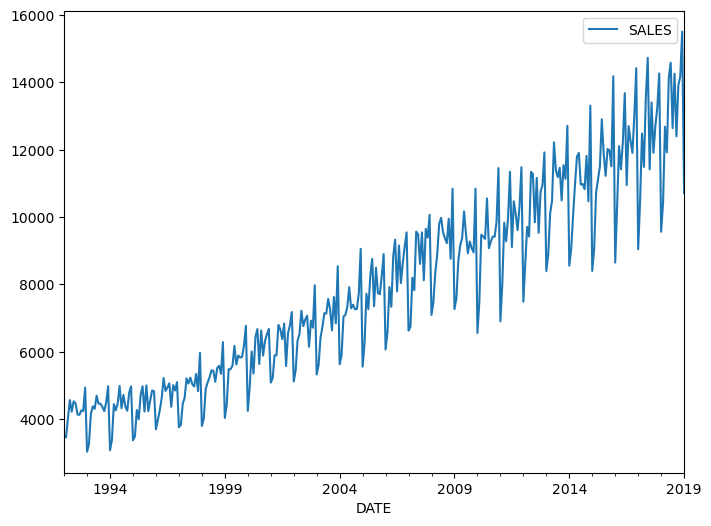

In [18]:
df.columns = ['SALES']
df.plot(figsize=(8,6))

In [19]:
df['Sales_in_last_month']=df['SALES'].shift(+1)
df['Sales_two_months_ago']=df['SALES'].shift(+2)
df['Sales_three_months_ago']=df['SALES'].shift(+3)
df

,SALES,Sales_in_last_month,Sales_two_months_ago,Sales_three_months_ago
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [20]:
df = df.dropna()
df

,SALES,Sales_in_last_month,Sales_two_months_ago,Sales_three_months_ago
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [21]:
import numpy as np
x1, x2, x3, y= df['Sales_in_last_month'], df['Sales_two_months_ago'], df['Sales_three_months_ago'], df['SALES']
x1, x2, x3, y= np.array(x1), np.array(x2), np.array(x3), np.array(y)
x1, x2, x3, y= x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1)
final_data_x= np.concatenate((x1, x2, x3),axis=1)
print(final_data_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)
rf_reg

RandomForestRegressor(max_features=3, random_state=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = final_data_x[:30], final_data_x[:30], y[:30], y[:30]

In [26]:

lin_reg.fit(x_train, y_train)

LinearRegression()

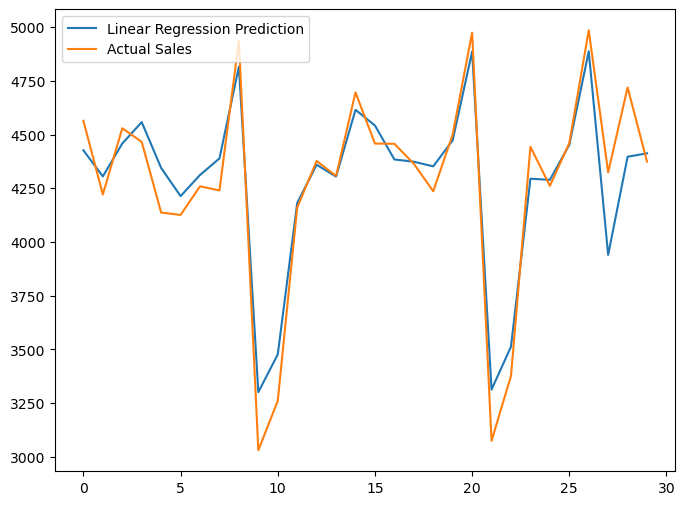

In [33]:
import matplotlib.pyplot as plt
lin_pred = lin_reg.predict(x_test)
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(pred, label = 'Linear Regression Prediction')
plt.plot(y_test, label = 'Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [34]:
rf_reg.fit(x_train, y_train)

C:\Users\anany\AppData\Local\Temp\ipykernel_36352\823635534.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


RandomForestRegressor(max_features=3, random_state=1)

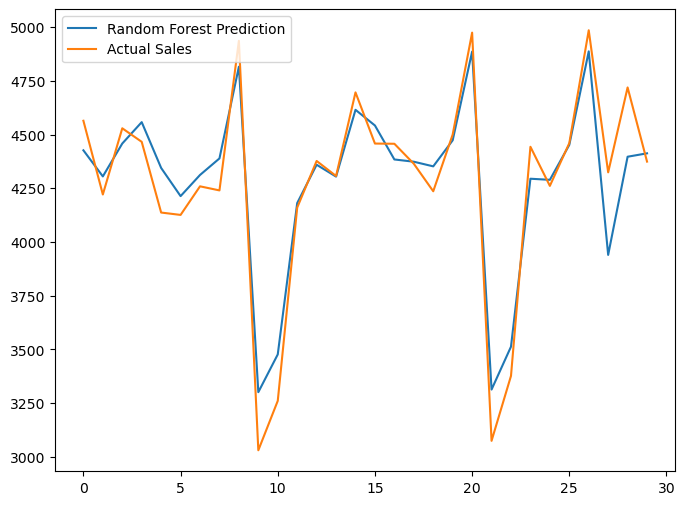

In [35]:
import matplotlib.pyplot as plt
rf_pred = rf_reg.predict(x_test)
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(pred, label = 'Random Forest Prediction')
plt.plot(y_test, label = 'Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rf_rms = sqrt(mean_squared_error(rf_pred, y_test))
linreg_rms = sqrt(mean_squared_error(lin_pred, y_test))
print('MSE for Random Forest model is: ', rf_rms)
print('MSE for Linear Regression model is: ', linreg_rms)

MSE for Random Forest model is:  147.40683985713372
MSE for Linear Regression model is:  467.66187671627154


Hence we would use Random Forest Model for our prediction here